In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = pd.read_csv('dataR2.csv', header=0)
cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


 PRELIMINARY ANALYSIS

In [3]:
print(cancer.describe())# there is great standard deviatiom in some of the variables (give example)
#meaning that some form of normalisation or standardisation could be useful
print(cancer.isnull().sum()) #no missing values

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    

In [ ]:
corr_matrix = cancer.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()
print(corr_matrix)

FEATURE SELECTION

<AxesSubplot:>

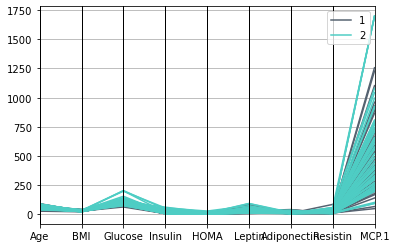

In [5]:
pd.plotting.parallel_coordinates(
 cancer, 'Classification', color=('#556270', '#4ECDC4')
)

In [6]:
cancer.iloc[:,0:10]
cancer_mod = cancer.drop(['Leptin','HOMA'], axis = 1)

In [7]:
cancer_mod

,Age,BMI,Glucose,Insulin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,33.750000,3.27000,392.460,2


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer_mod.iloc[:, 0:7], 
                                                   cancer['Classification'],
                                                   test_size = 0.20,
                                                   random_state = 0)

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.20,
                                                  random_state = 0)

x_train.shape,y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((73, 7), (73,), (24, 7), (24,), (19, 7), (19,))

In [9]:
x_train

,Age,BMI,Glucose,Insulin,Adiponectin,Resistin,MCP.1
4,86,21.111111,92,3.549,4.819240,10.57635,773.920
34,51,27.688778,77,3.855,3.192090,10.37518,473.859
85,65,29.666548,85,14.649,7.282870,19.46324,1698.440
33,43,34.422174,89,23.194,8.300955,6.71026,960.246
55,34,24.242424,92,21.699,21.823745,12.06534,481.949
...,...,...,...,...,...,...,...
67,64,22.222222,98,5.700,4.783985,13.91245,395.976
77,43,31.250000,103,4.328,12.718960,38.65310,775.322
20,36,28.576676,86,4.345,8.600000,9.15390,534.224
75,43,26.562500,101,10.555,6.420295,16.10000,806.724


In [10]:
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score, precision_score, f1_score

k = []
weight_knn = []
acc_knn = []
prec_knn = []
f1_knn = []


uniform_df = pd.DataFrame(columns = ["n", "Accuracy", "Precision", "F1"])
distance_df = pd.DataFrame(columns = ["n", "Accuracy", "Precision", "F1"])

 
# Pre-processing of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
scaler.fit(x_val)


X_Norm_train=scaler.transform(x_train)
X_Norm_val = scaler.transform(x_val)


y_Norm_train= y_train
y_Norm_val = y_val


for weights in ["uniform", "distance"]:
    for i in range(1,10):
        k.append(i)
        knn_clf = neighbors.KNeighborsClassifier(n_neighbors = i, weights=weights)
        knn_clf.fit(X_Norm_train, y_Norm_train)
        knn_pred=knn_clf.predict(X_Norm_val)
        
        acc_knn.append(accuracy_score(y_Norm_val, knn_pred))
        prec_knn.append(precision_score(y_Norm_val, knn_pred))
        f1_knn.append(f1_score(y_Norm_val, knn_pred))

uniform_df["n"] = k[0:9]
uniform_df["Accuracy"] = acc_knn[0:9]
uniform_df["Precision"] = prec_knn[0:9]
uniform_df["F1"] = f1_knn[0:9]

distance_df["n"] = k[9:18]
distance_df["Accuracy"] = acc_knn[9:18]
distance_df["Precision"] = prec_knn[9:18]
distance_df["F1"] = f1_knn[9:18]

uniform_df

,n,Accuracy,Precision,F1
0,1,0.684211,0.555556,0.625000
1,2,0.631579,0.500000,0.666667
2,3,0.631579,0.500000,0.631579
3,4,0.578947,0.461538,0.600000
4,5,0.684211,0.545455,0.666667
5,6,0.526316,0.428571,0.571429
6,7,0.684211,0.545455,0.666667
7,8,0.631579,0.500000,0.631579
8,9,0.473684,0.333333,0.375000


In [11]:
distance_df

,n,Accuracy,Precision,F1
0,1,0.684211,0.555556,0.625000
1,2,0.684211,0.555556,0.625000
2,3,0.578947,0.461538,0.600000
3,4,0.631579,0.500000,0.631579
4,5,0.631579,0.500000,0.631579
5,6,0.631579,0.500000,0.631579
6,7,0.631579,0.500000,0.631579
7,8,0.684211,0.545455,0.666667
8,9,0.631579,0.500000,0.631579


In [12]:
##From both tables, it can be seen that the highest accuracy and F1 is achieved
## when k =5 at uniform 

In [13]:
scaler.fit(x_test)
X_Norm_test = scaler.transform(x_test)


y_Norm_test = y_test

n_neighbors=5

for weights in ["uniform", "distance"]:
    opt_knn_clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    opt_knn_clf.fit(X_Norm_train, y_Norm_train)
    opt_knn_pred=opt_knn_clf.predict(X_Norm_test)
    print(f' {weights}:')
    print(f'acuracy is:{accuracy_score(y_Norm_test, opt_knn_pred)}')
    print(f'precision is:{precision_score(y_Norm_test, opt_knn_pred)}')
    print(f'F1 is:{f1_score(y_Norm_test, opt_knn_pred)}\n')
    


 uniform:
acuracy is:0.875
precision is:0.8333333333333334
F1 is:0.8695652173913043

 distance:
acuracy is:0.875
precision is:0.8333333333333334
F1 is:0.8695652173913043



In [14]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((73, 7), (73,), (24, 7), (24,), (19, 7), (19,))

Decision Tree classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

acc_dt = []
prec_dt = []
f1_dt = []
depth = []
sample = []
criteria = []

for a in ["entropy", "gini"]:
    for b in range(1,12):
        for c in range(1,12):
            dt =DecisionTreeClassifier(criterion=a,random_state=0, max_depth=b, min_samples_leaf=c)
            dt.fit(x_train,y_train)
            dt_pred_val=dt.predict(x_val)
            
            criteria.append(a)
            depth.append(b)
            sample.append(c)
            acc_dt.append(accuracy_score(y_val, dt_pred_val))
            prec_dt.append(precision_score(y_val, dt_pred_val))
            f1_dt.append(f1_score(y_val, dt_pred_val, average='micro'))


data_dt = {"Depth" : depth , 
           "Sample" : sample, 
           "Accuracy" : acc_dt,
           "Precision" : prec_dt, 
           "F1" : f1_dt, 
           "Criterion" : criteria}

dt_df = pd.DataFrame(data = data_dt)

dt_df.loc[dt_df["Accuracy"] == dt_df["Accuracy"].max()]

print(type(y_val))


<class 'pandas.core.series.Series'>


In [16]:
dt_df.loc[dt_df["Precision"] == dt_df["Precision"].max()]

,Depth,Sample,Accuracy,Precision,F1,Criterion
25,3,4,0.684211,0.555556,0.684211,entropy
26,3,5,0.684211,0.555556,0.684211,entropy
27,3,6,0.684211,0.555556,0.684211,entropy
33,4,1,0.684211,0.555556,0.684211,entropy
34,4,2,0.684211,0.555556,0.684211,entropy
35,4,3,0.684211,0.555556,0.684211,entropy
44,5,1,0.684211,0.555556,0.684211,entropy
45,5,2,0.684211,0.555556,0.684211,entropy
55,6,1,0.684211,0.555556,0.684211,entropy
56,6,2,0.684211,0.555556,0.684211,entropy


In [17]:
dt_df.loc[dt_df["F1"] == dt_df["F1"].max()]

## it is clear that these hyperparameters achieve the best results. In order to choose the best 
## hyperparameters out of these, we need to select the minimum values to reduce the computational 
# load. There is no need choosing higher values for the depth or samples (spend more time training)
# when the same results can be achieved with lower values

## The optimaldecision tree classifier will use 'gini' as the criterion, have a maximum depth of 3
## and a minimum sample leaf split of 2

,Depth,Sample,Accuracy,Precision,F1,Criterion
25,3,4,0.684211,0.555556,0.684211,entropy
26,3,5,0.684211,0.555556,0.684211,entropy
27,3,6,0.684211,0.555556,0.684211,entropy
33,4,1,0.684211,0.555556,0.684211,entropy
34,4,2,0.684211,0.555556,0.684211,entropy
...,...,...,...,...,...,...
233,11,3,0.684211,0.555556,0.684211,gini
234,11,4,0.684211,0.555556,0.684211,gini
235,11,5,0.684211,0.555556,0.684211,gini
236,11,6,0.684211,0.545455,0.684211,gini


In [18]:
##Optimal Decision Tree classifier


opt_dt_model =DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3, min_samples_leaf=2)
opt_dt_model.fit(x_train,y_train)
dt_pred_test=opt_dt_model.predict(x_test)
dt_test_f1 = f1_score(y_test, dt_pred_test, average='micro')
dt_test_acc = accuracy_score(y_test, dt_pred_test)
dt_test_prec = precision_score(y_test, dt_pred_test)
print(f'test F1:{dt_test_f1}, test acc:{dt_test_acc}, test prec:{dt_test_prec}')

test F1:0.7083333333333334, test acc:0.7083333333333334, test prec:0.6428571428571429


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_f1 = []
ab_acc = []
ab_prec = []
est = []
lr = []
ab_depth = []
ab_samples = []
ab_criteria = []

for e in range(25, 600, 25):
    for l in np.arange(0.1, 4.0, 0.1):
        ab = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', random_state=0,  
                                                       max_depth=3, min_samples_leaf=2),
                                n_estimators = e, learning_rate = l)
        ab.fit(x_train, y_train)
        pred_ab = ab.predict(x_val)
                                        
        est.append(e)
        lr.append(l)
                    
        ab_f1.append(f1_score(y_val, pred_ab, average='micro'))
        ab_acc.append(accuracy_score(y_val, pred_ab))
        ab_prec.append(precision_score(y_val, pred_ab))
            
        
data_ab = {"No. of estimators" : est , 
           "Learning rate" : lr, 
           "Accuracy" : ab_acc,
           "Precision" : ab_prec, 
           "F1" : ab_f1}

ab_df = pd.DataFrame(data = data_ab)
ab_df.head()

In [ ]:
ab_df.loc[ab_df["Accuracy"] == ab_df["Accuracy"].max()]

In [ ]:
ab_df.loc[ab_df["Precision"] == ab_df["Precision"].max()]

In [ ]:
ab_df.loc[ab_df["F1"] == ab_df["F1"].max()]

## From the results, the optimal parameters are where the number of estimators is 375 and
## the learning rate is 0.5

In [ ]:
##optimal AdaBoost

## used the optimised parameters of the decision tree classifier within the optimised AdaBoost 

opt_ab = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', random_state=0,  max_depth=3, 
                                                   min_samples_leaf=2),
                            n_estimators = 375, learning_rate = 0.5, random_state = 0
                           )

opt_ab.fit(x_train, y_train)
pred_optab = opt_ab.predict(x_test)
optab_f1 = f1_score(y_test, pred_optab, average='micro')
optab_acc = accuracy_score(y_test, pred_optab)
optab_prec = precision_score(y_test, pred_optab)
print(f'test F1:{optab_f1}, test acc:{optab_acc}, test prec:{optab_prec}')

Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)
scaler.fit(x_val)


X_Norm_train=scaler.transform(x_train)
X_Norm_val = scaler.transform(x_val)
y_Norm_train= y_train
y_Norm_val = y_val

par_kernel = []
par_degree = []
par_c = []
par_gamma = []

acc_sv = []
prec_sv = []
f1_sv = []

kernels=['linear','poly','rbf']
for kernel in kernels: 
    for degree in range(1,10):
        for c in [0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
            for gamma in [1e-3, 1e-2, 1e-1, 1, 1e1]:
                sv_clf = svm.SVC(kernel=kernel, degree=degree,C=c, gamma = gamma)
                sv_clf.fit(X_Norm_train, y_Norm_train)
                svpred_val = sv_clf.predict(X_Norm_val)
                
                par_kernel.append(kernel)
                par_degree.append(degree)
                par_c.append(c)
                par_gamma.append(gamma)
                
                acc_sv.append(accuracy_score(y_Norm_val, svpred_val))
                prec_sv.append(precision_score(y_test, svpred_test))
                f1_sv.append(f1_score(y_test, svpred_test, average="micro"))

In [ ]:
data_sv = {"Kernel" : par_kernel , 
           "Degree" : par_degree,
           "C" : par_c,
           "Gamma" : par_gamma,
           "Accuracy" : acc_sv,
           "Precision" : prec_sv, 
           "F1" : f1_sv}

sv_df = pd.DataFrame(data = data_sv)

In [ ]:
sv_df.head()

In [ ]:
sv_df.loc[sv_df["Accuracy"] == sv_df["Accuracy"].max()]

In [ ]:
sv_df.loc[sv_df["F1"] == sv_df["F1"].max()]
# shows that the optimal model is that with a 'poly' kernel, degree of 4, C value of 50, gamma value
# of 0.1

In [ ]:
#Optimal SVM

scaler.fit(x_test)
X_Norm_test = scaler.transform(x_test)
y_Norm_test = y_test

opt_sv_clf = svm.SVC(kernel='poly', degree=2,C=80, gamma = 0.01)
opt_sv_clf.fit(X_Norm_train, y_Norm_train)
opt_svpred_test = opt_sv_clf.predict(X_Norm_test)

optsv_f1 = f1_score(y_Norm_test, opt_svpred_test, average='micro')
optsv_acc = accuracy_score(y_Norm_test, opt_svpred_test)
optsv_prec = precision_score(y_test, opt_svpred_test)
print(f'test F1:{optsv_f1}, test acc:{optsv_acc}, test prec:{optsv_prec}')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

knn_conf = opt_knn_clf.predict_proba(X_Norm_test)

tpr, fpr, thresholds = roc_curve(y_Norm_test, knn_conf[:,1], pos_label=1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
